<a href="https://colab.research.google.com/github/Justabhi96/TF2.0/blob/master/10_Auto_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 52kB/s 
     |████████████████████████████████| 3.1MB 34.3MB/s 
     |████████████████████████████████| 501kB 69.1MB/s 


In [0]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

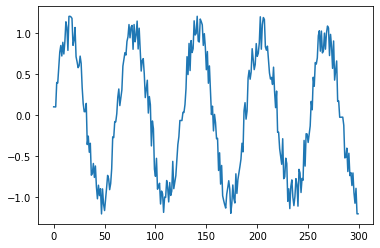

In [0]:
data = np.sin(0.1*np.arange(300)) + np.random.randint(-2, 3, (300,))*0.1
plt.plot(data)

In [0]:
T = 10
X = []
y = []
for i in range(len(data) - T):
  X.append(data[i: i+T])
  y.append(data[i+T])

X = np.array(X).reshape(-1, T)
y = np.array(y)
N = len(X)
X.shape

(290, 10)

In [0]:
i = Input(shape = (T,))
x = Dense(1)(i)

model = Model(i, x)
model.compile(loss = "mse", optimizer = Adam(learning_rate = 0.1))

r = model.fit(X[:N//2, :], y[:N//2], validation_data = (X[N//2:, :], y[N//2:]), epochs = 100)

Train on 145 samples, validate on 145 samples
Epoch 1/100
145/145 [==============================] - 0s 470us/sample - loss: 0.1816 - val_loss: 0.1051
Epoch 2/100
145/145 [==============================] - 0s 84us/sample - loss: 0.1118 - val_loss: 0.0974
Epoch 3/100
145/145 [==============================] - 0s 89us/sample - loss: 0.0800 - val_loss: 0.0814
Epoch 4/100
145/145 [==============================] - 0s 73us/sample - loss: 0.0528 - val_loss: 0.0600
Epoch 5/100
145/145 [==============================] - 0s 73us/sample - loss: 0.0540 - val_loss: 0.0539
Epoch 6/100
145/145 [==============================] - 0s 74us/sample - loss: 0.0515 - val_loss: 0.0517
Epoch 7/100
145/145 [==============================] - 0s 79us/sample - loss: 0.0465 - val_loss: 0.0493
Epoch 8/100
145/145 [==============================] - 0s 81us/sample - loss: 0.0407 - val_loss: 0.0435
Epoch 9/100
145/145 [==============================] - 0s 66us/sample - loss: 0.0377 - val_loss: 0.0420
Epoch 10/100
145/

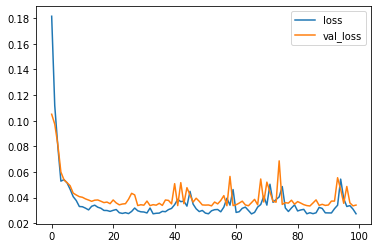

In [0]:
plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend()

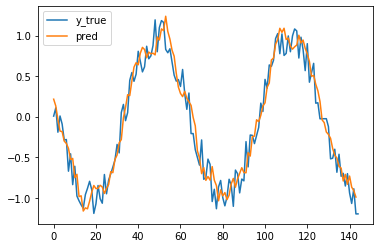

In [0]:
# This is not correct way toe forcast values since here we are taking true values not the predicted values
# to forecast next value
X_test = X[N//2:, :]
y_test = y[N//2:]
prediction_data = []

for i in range(len(X_test)-1):
  prediction_data.append(model.predict(X_test[i].reshape(-1, 10))[0, 0])

plt.plot(y_test, label = "y_true")
plt.plot(prediction_data, label = "pred")
plt.legend()

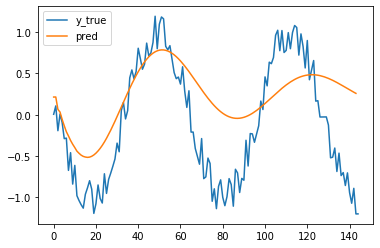

In [0]:
# This is correct way to forcast values since here we are taking predicted values
# to forcast next sequence
y_test = y[N//2:]
prediction_data = []
X_last = X[N//2]

for i in range(len(X_test)-1):
  pred = model.predict(X_last.reshape(-1, 10))[0, 0]
  prediction_data.append(pred)

  X_last = np.roll(X_last, -1)
  X_last[-1] = pred

plt.plot(y_test, label = "y_true")
plt.plot(prediction_data, label = "pred")
plt.legend()